This is mainly EDA a work.Try to find out different information and visualize them.

The work will done by asking different question.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1zmoWfePlUhMRjHxMq0lKEoocVPxK1vb3'}) # replace the id with id of file you want to access
downloaded.GetContentFile('65 Years of Weather Data Bangladesh (1948 - 2013).csv') 

In [1]:
# importing the necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from six.moves import urllib

In [2]:
df = pd.read_csv('65 Years of Weather Data Bangladesh (1948 - 2013).csv')

In [3]:
df.head(10)

Station Names  YEAR  Month  Max Temp  Min Temp  Rainfall  Relative Humidity  \
0       Barisal  1949      1      29.4      12.3       0.0               68.0   
1       Barisal  1950      1      30.0      14.1       0.0               77.0   
2       Barisal  1951      1      28.2      12.3       0.0               77.0   
3       Barisal  1952      1      26.6      12.3       2.0               77.0   
4       Barisal  1953      1      30.0      13.3      10.0               75.0   
5       Barisal  1954      1      27.8      12.7       0.0               72.0   
6       Barisal  1955      1      26.6      12.3       2.0               77.0   
7       Barisal  1956      1      29.4      14.3      17.0               74.0   
8       Barisal  1957      1      30.1      15.1     104.0               80.0   
9       Barisal  1958      1      31.1      15.5       0.0               77.0   

   Wind Speed  Cloud Coverage  Bright Sunshine  Station Number     X_COR  \
0    0.453704             0.6         7.831915           41950  536809.8   
1    0.453704             0.8         7.831915           41950  536809.8   
2    0.453704             0.6         7.831915           41950  536809.8   
3    0.453704             1.0         7.831915           41950  536809.8   
4    0.453704             1.6         7.831915           41950  536809.8   
5    0.453704             0.5         7.831915           41950  536809.8   
6    0.453704             1.0         7.831915           41950  536809.8   
7    0.453704             0.4         7.831915           41950  536809.8   
8    0.453704             1.0         7.831915           41950  536809.8   
9    0.453704             1.7         7.831915           41950  536809.8   

      Y_COR  LATITUDE  LONGITUDE  ALT   Period  
0  510151.9      22.7      90.36    4  1949.01  
1  510151.9      22.7      90.36    4  1950.01  
2  510151.9      22.7      90.36    4  1951.01  
3  510151.9      22.7      90.36    4  1952.01  
4  510151.9      22.7      90.36    4  1953.01  
5  510151.9      22.7      90.36    4  1954.01  
6  510151.9      22.7      90.36    4  1955.01  
7  510151.9      22.7      90.36    4  1956.01  
8  510151.9      22.7      90.36    4  1957.01  
9  510151.9      22.7      90.36    4  1958.01

In [4]:
df.isnull().sum()

Station Names        0
YEAR                 0
Month                0
Max Temp             0
Min Temp             0
Rainfall             0
Relative Humidity    0
Wind Speed           0
Cloud Coverage       0
Bright Sunshine      0
Station Number       0
X_COR                0
Y_COR                0
LATITUDE             0
LONGITUDE            0
ALT                  0
Period               0
dtype: int64

## EDA 

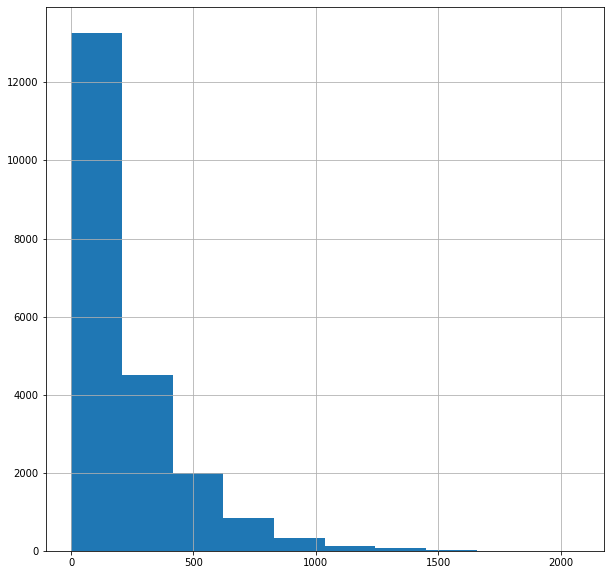

In [5]:
plt.figure(figsize = (10 , 10))
df.Rainfall.hist()

### Which year have highest Rainfall.

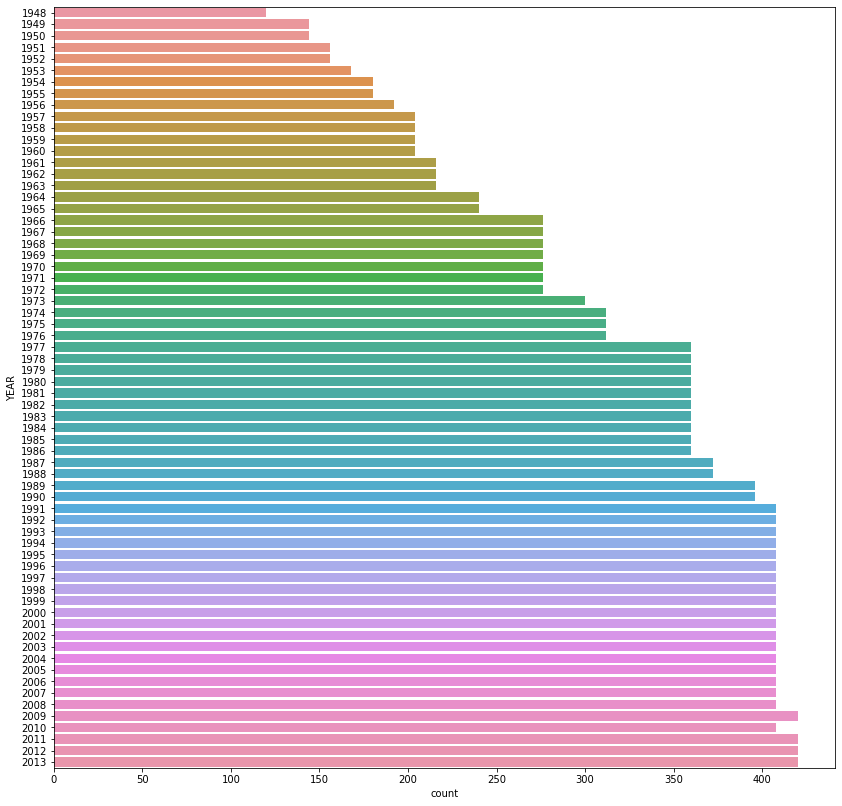

In [6]:
plt.figure(figsize = (14 , 14))
sns.countplot(y = 'YEAR' , data = df)

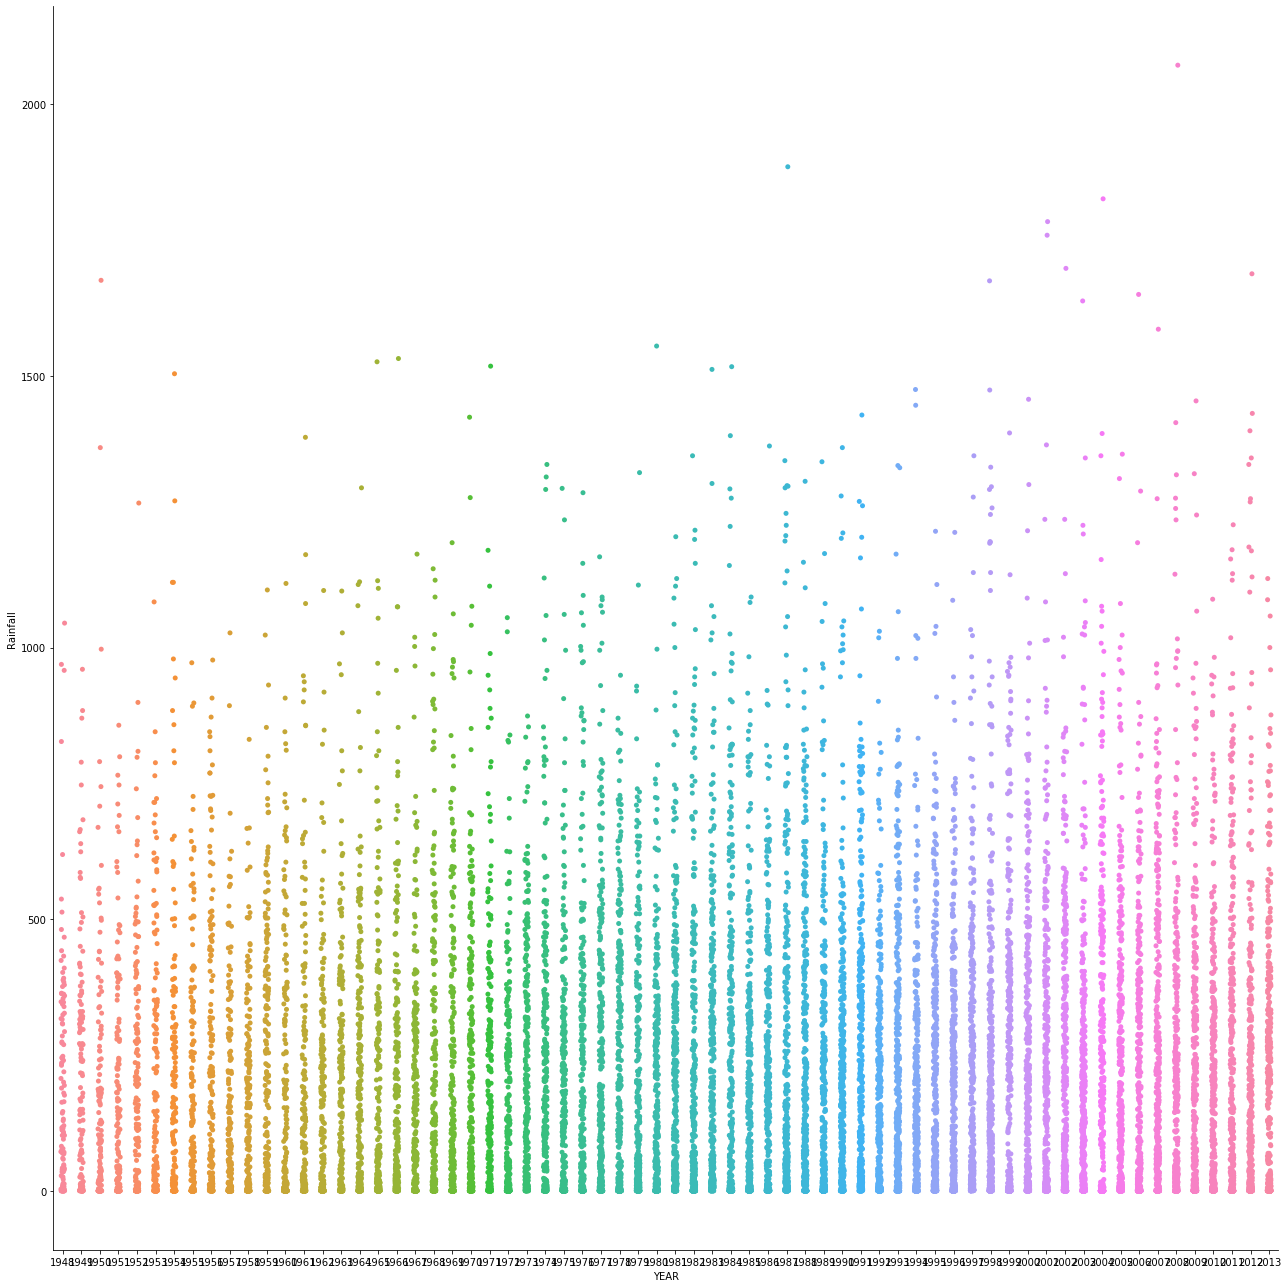

In [7]:
sns.catplot(x = "YEAR" , y = "Rainfall" , data = df  , height = 18)

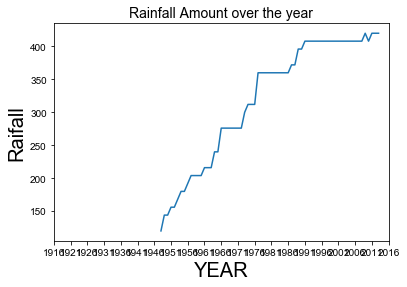

In [8]:
df.groupby('YEAR').count()['Station Number'].plot(xticks  = np.arange(1916 , 2017 , 5))

# Plot on grpah
sns.set(rc = {'figure.figsize':(20 , 10)})
plt.title("Rainfall Amount over the year",fontsize = 14)
plt.xlabel('YEAR',fontsize = 20)
plt.ylabel('Raifall',fontsize = 20)
sns.set_style("whitegrid")

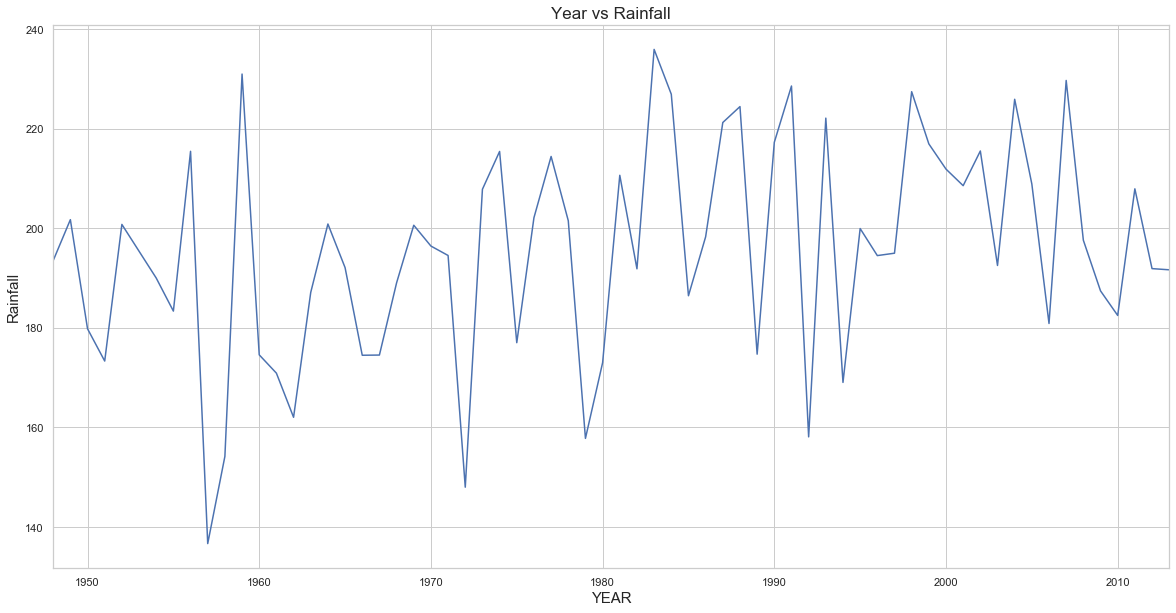

In [9]:
df.groupby('YEAR')['Rainfall'].mean().plot()

plt.title('Year vs Rainfall' , fontsize = 17)
plt.xlabel('YEAR' , fontsize = 15)
plt.ylabel('Rainfall' , fontsize = 15)

sns.set(rc={'figure.figsize':(20 , 12)})
#sns.set_style("whitegrid")

It is clear that after 2010 the rainfall decresing drastically.Higest rainfall occur between 1950 to 1960.After 1980-1990 there was good amount of rainfall occured.

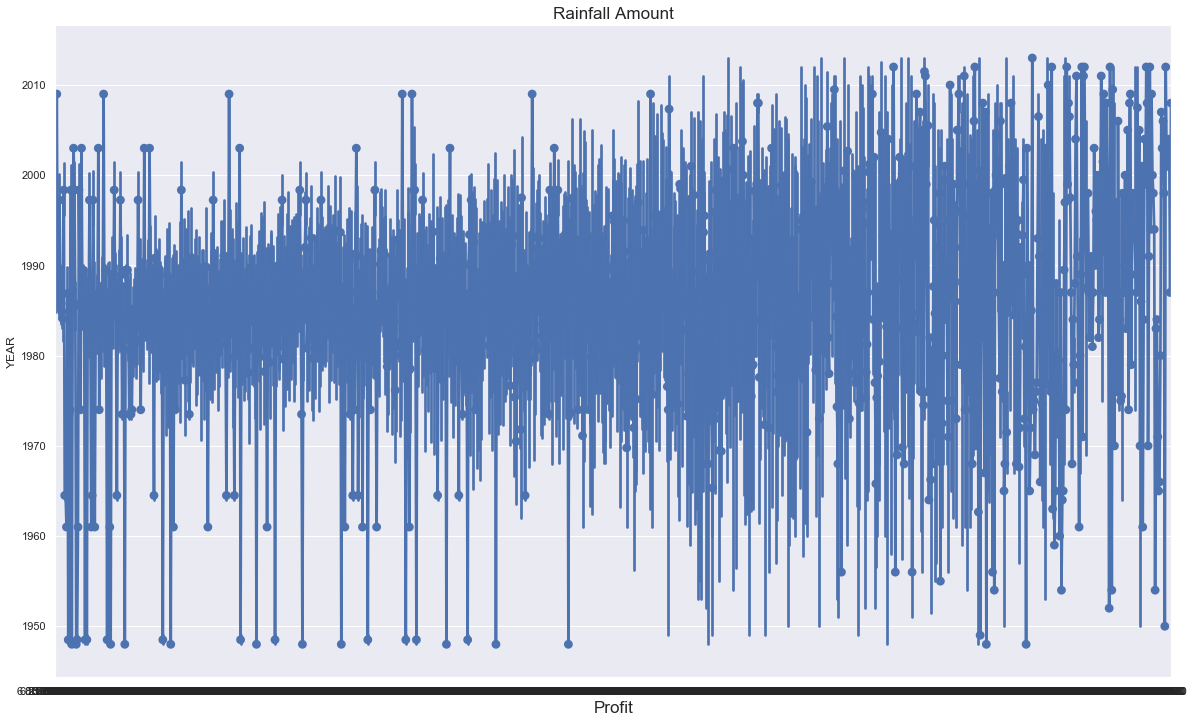

In [10]:
ax = sns.pointplot(x = df['Rainfall'] , y = df['YEAR'])

sns.set(rc = {'figure.figsize':(10 , 10)})

ax.set_title("Rainfall Amount",fontsize = 17)
ax.set_xlabel("Profit",fontsize = 17)
sns.set_style("darkgrid")

### Area which have highest Rainfall

In [11]:
df['Station Names'].value_counts()

Bogra                        792
Comilla                      792
Srimangal                    792
Satkhira                     792
Khulna                       792
Mymensingh                   792
Dinajpur                     792
Cox's Bazar                  792
Faridpur                     792
Jessore                      792
Barisal                      780
Chittagong (IAP-Patenga)     780
Maijdee Court                756
Dhaka                        732
Rangpur                      720
Sylhet                       696
Rangamati                    684
Ishurdi                      636
Chandpur                     600
Rajshahi                     600
Hatiya                       576
Sandwip                      576
Bhola                        576
Patuakhali                   492
Feni                         492
Khepupara                    480
Teknaf                       444
Madaripur                    444
Kutubdia                     444
Sitakunda                    444
Tangail   

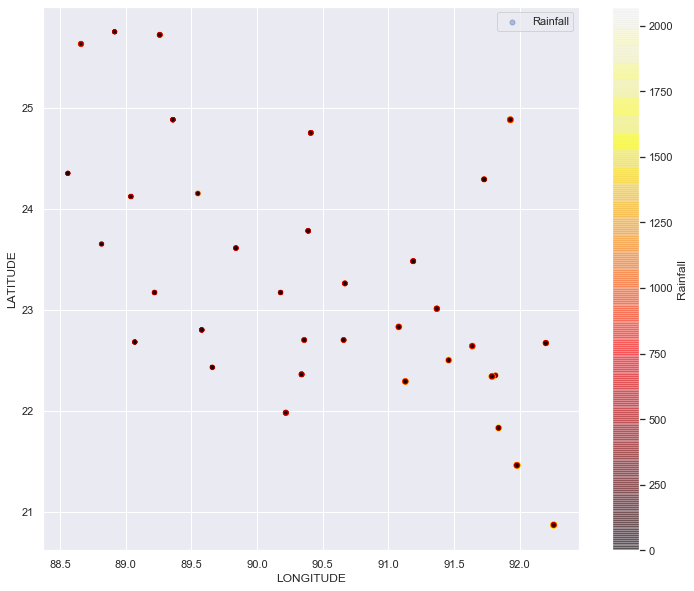

In [41]:
df.plot(kind = "scatter" , x = "LONGITUDE", y="LATITUDE", alpha = 0.4,
    s = df["Rainfall"]/40 , label = "Rainfall" , figsize = (12 , 10),
    c="Rainfall" ,     
    cmap=plt.get_cmap("hot"), colorbar=True,
    sharex=False)

plt.legend()
#save_fig("Mping")

In [50]:
images_path = 'C:/Users/Mahmudur Limon/Downloads/data/jupiter Code/projectd/Rainfall inbd'
filename = 'mat4.png'

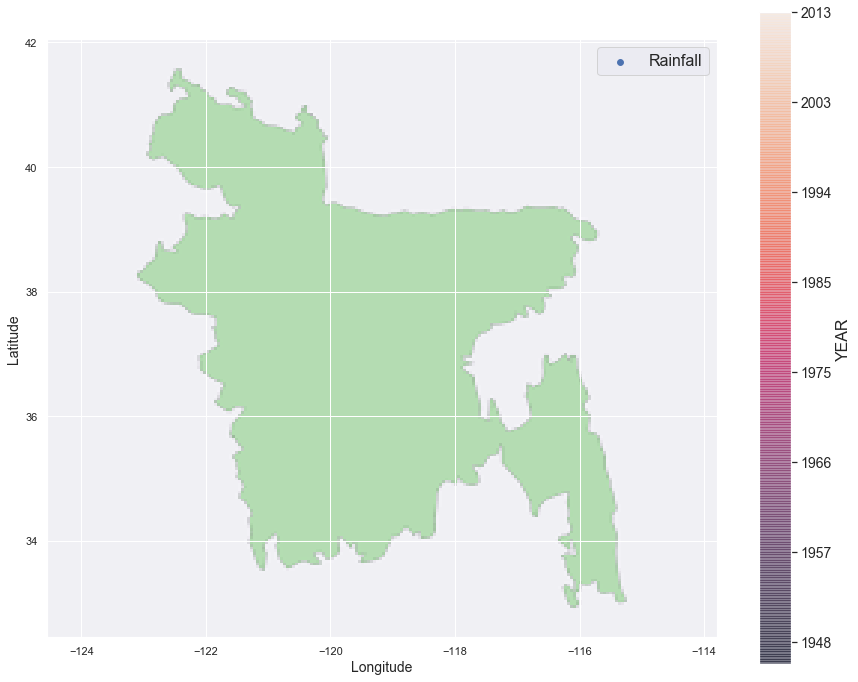

In [64]:
california_img = mpimg.imread(os.path.join(images_path, filename))

ax = df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", figsize=(15 , 12),
                       s=df['Rainfall']/30 , label="Rainfall",
                       c="YEAR" , cmap = 'Reds',
                       colorbar = False
                      )


#extent = [-124.55, -113.80, 32.45, 42.05]
plt.imshow(california_img , extent = [-124.55, -113.80, 32.45, 42.05] , alpha = 0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["YEAR"]
tick_values = np.linspace(prices.min(), prices.max() , 8)

cbar = plt.colorbar()
cbar.ax.set_yticklabels(["%d"%(v) for v in tick_values], fontsize=14)
cbar.set_label('YEAR', fontsize=16)

plt.legend(fontsize=16)
plt.show()
#save_fig("california_housing_prices_plot")

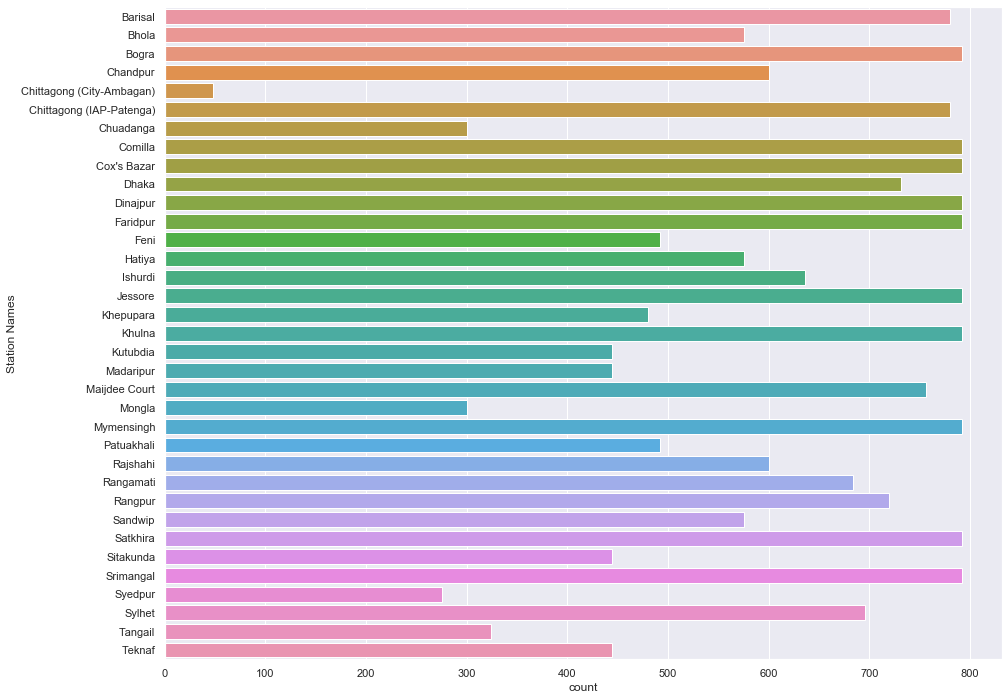

In [0]:
plt.figure(figsize = (15 , 12))
sns.countplot(y = 'Station Names' , data = df)

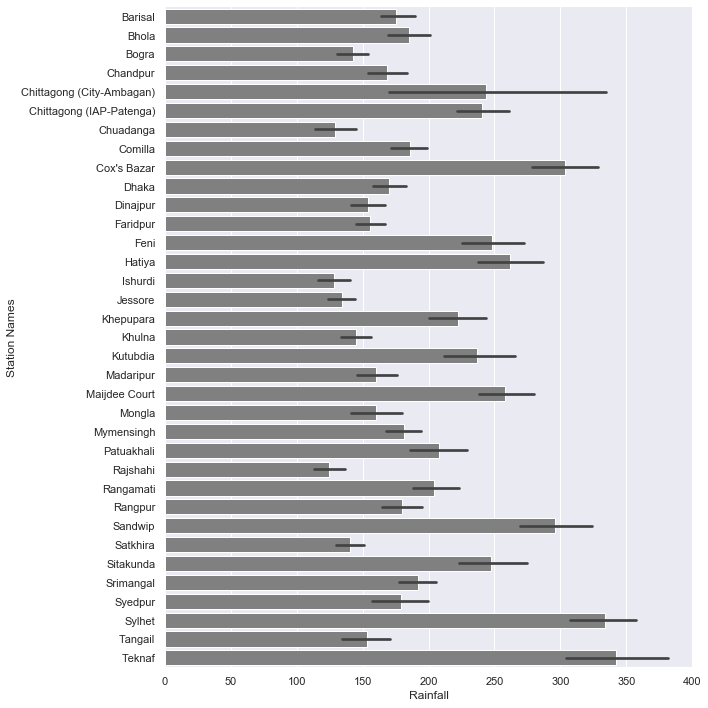

In [0]:
g = sns.catplot(x = "Rainfall" , y = "Station Names" , data = df , kind = 'bar' , height = 10 , color = 'gray')
g.despine(left=True)

From the above graph it is clear thet Tecnaf , Sandwip , Cox-bazar , Sylhet has the highest amount of rainfall.Besides that Chuadanga , Isurdi , Rajshahi has lowest amount of rainfall.

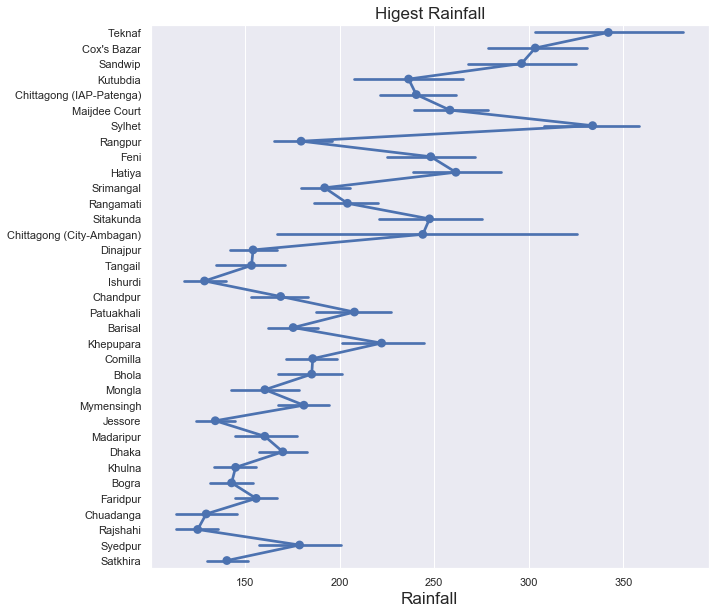

In [0]:
info = pd.DataFrame(df['Rainfall'].sort_values(ascending = False))
info['Station Names'] = df['Station Names']
data = list(map(str,(info['Station Names'])))
x = list(data[:])
y = list(info['Rainfall'][:])

ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
ax.set_title("Higest Rainfall",fontsize = 17)
ax.set_xlabel("Rainfall",fontsize = 17)
sns.set_style("darkgrid")

We analysis further for better and accurate result which District have higest amount of rainfall.

### Top 5 District which have Higest Rainfall

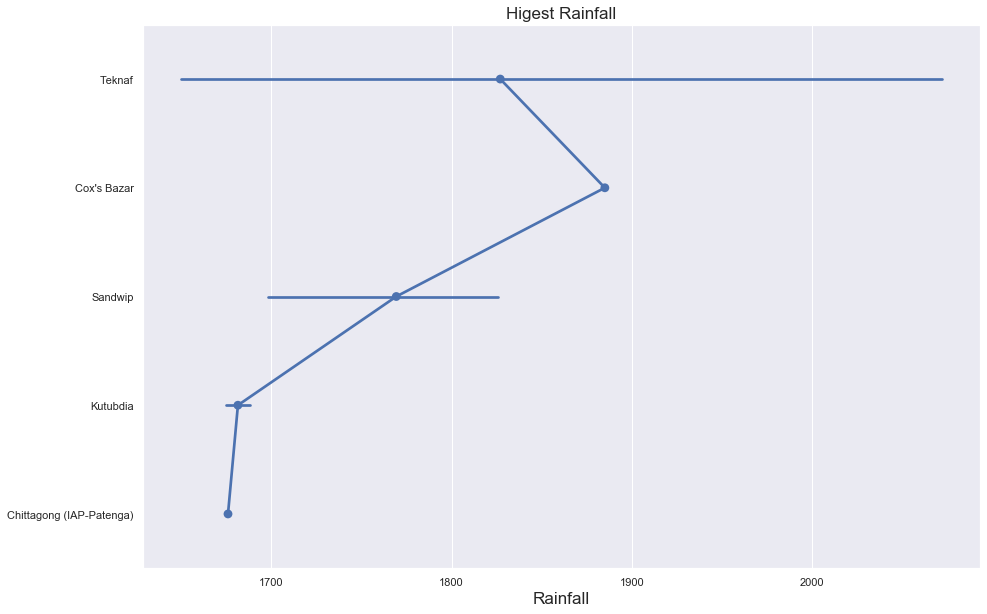

In [0]:
info = pd.DataFrame(df['Rainfall'].sort_values(ascending = False))
info['Station Names'] = df['Station Names']
data = list(map(str,(info['Station Names'])))
x = list(data[:10])
y = list(info['Rainfall'][:10])

ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
#setup the title and labels of the plot.
ax.set_title("Higest Rainfall",fontsize = 17)
ax.set_xlabel("Rainfall",fontsize = 17)
sns.set_style("darkgrid")

### Top 5 District Which have Lowest Rainfall

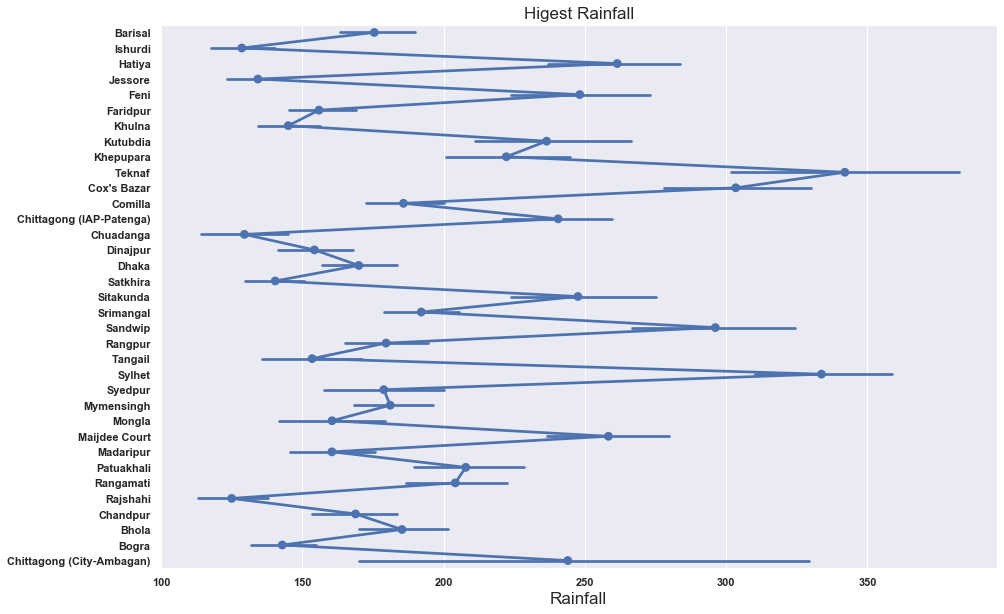

In [0]:
info = pd.DataFrame(df['Rainfall'].sort_values(ascending = True))
info['Station Names'] = df['Station Names']
data = list(map(str,(info['Station Names'])))
x = list(data[:])
y = list(info['Rainfall'][:])

ax = sns.pointplot(x=y,y=x)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
#setup the title and labels of the plot.
ax.set_title("Higest Rainfall",fontsize = 17)
ax.set_xlabel("Rainfall",fontsize = 17)
sns.set_style("darkgrid")

### Monthly Rainfall

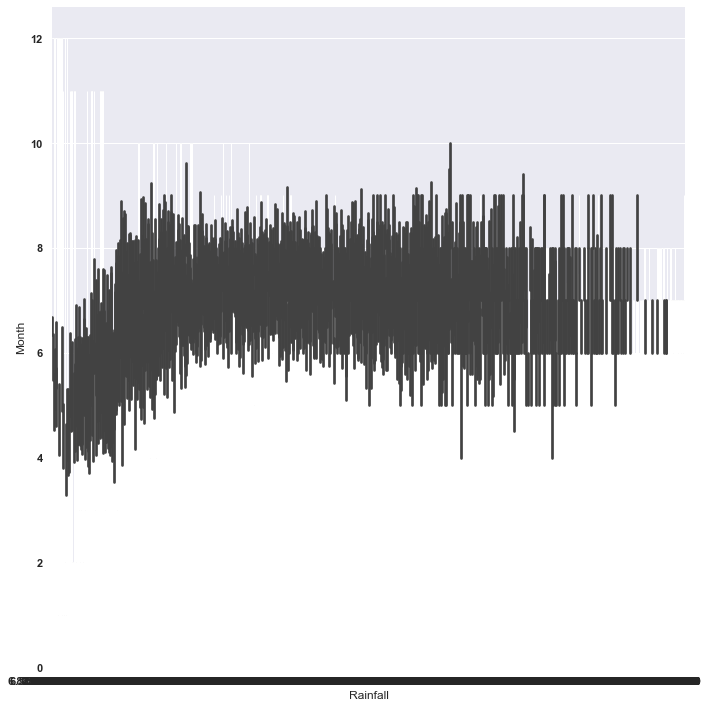

In [0]:
g = sns.catplot(x = "Rainfall" , y = "Month" , data = df , kind = 'bar' , height = 10 , color = 'green')
g.despine(left=True)

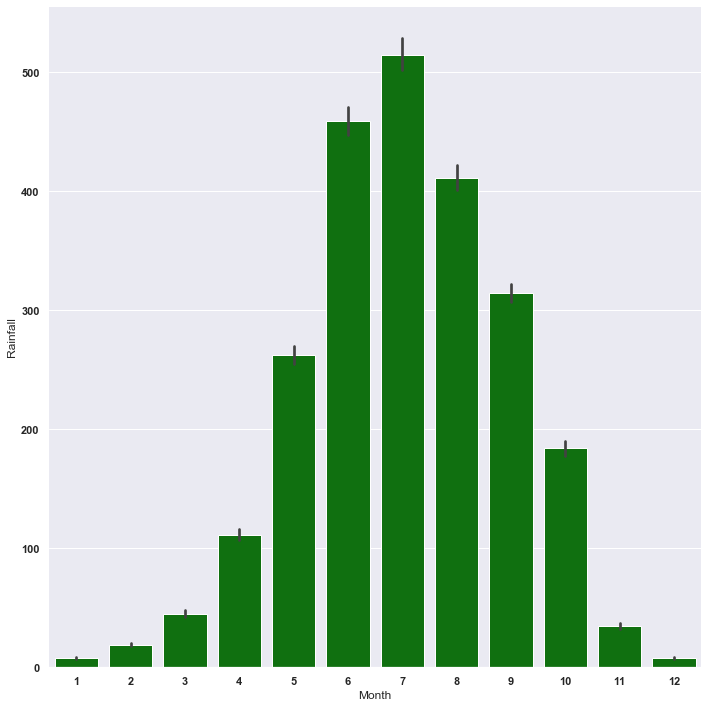

In [0]:
g = sns.catplot(x = "Month" , y = "Rainfall" , data = df , kind = 'bar' , height = 10 , color = 'green')
g.despine(left=True)

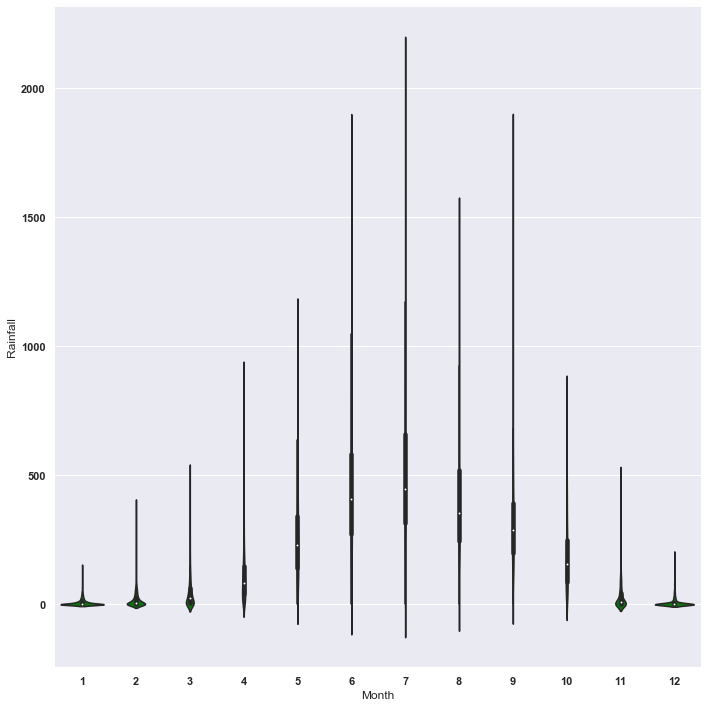

In [0]:
g = sns.catplot(x = "Month" , y = "Rainfall" , data = df , kind = 'violin' , height = 10 , color = 'green')
g.despine(left=True)

In Bnagladesh JUNE,JULY and August month have the higest amount of rainfall occured.Both the graph show the same result.

### Realtion between temperature and Rainfall

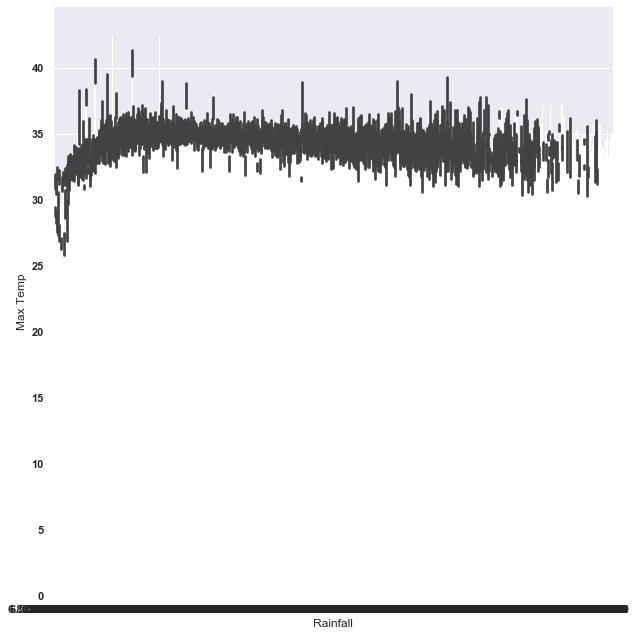

In [0]:
sns.catplot(x = 'Rainfall' , y = 'Max Temp' , data = df , height = 9 , kind = 'bar' , palette = "cividis")

### Find out the relation with temparature rainfall in an area

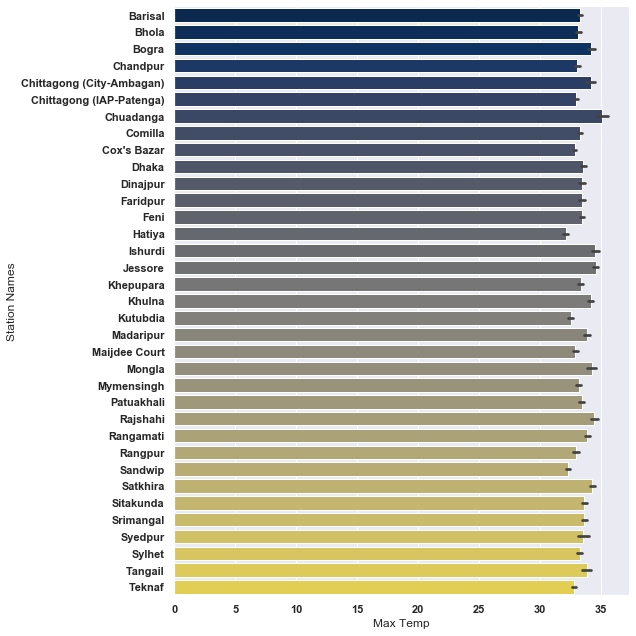

In [0]:
sns.catplot(x = 'Max Temp' , y = 'Station Names' , data = df , height = 9 , kind = 'bar' , palette = "cividis")

Almost all the area have high temperature.

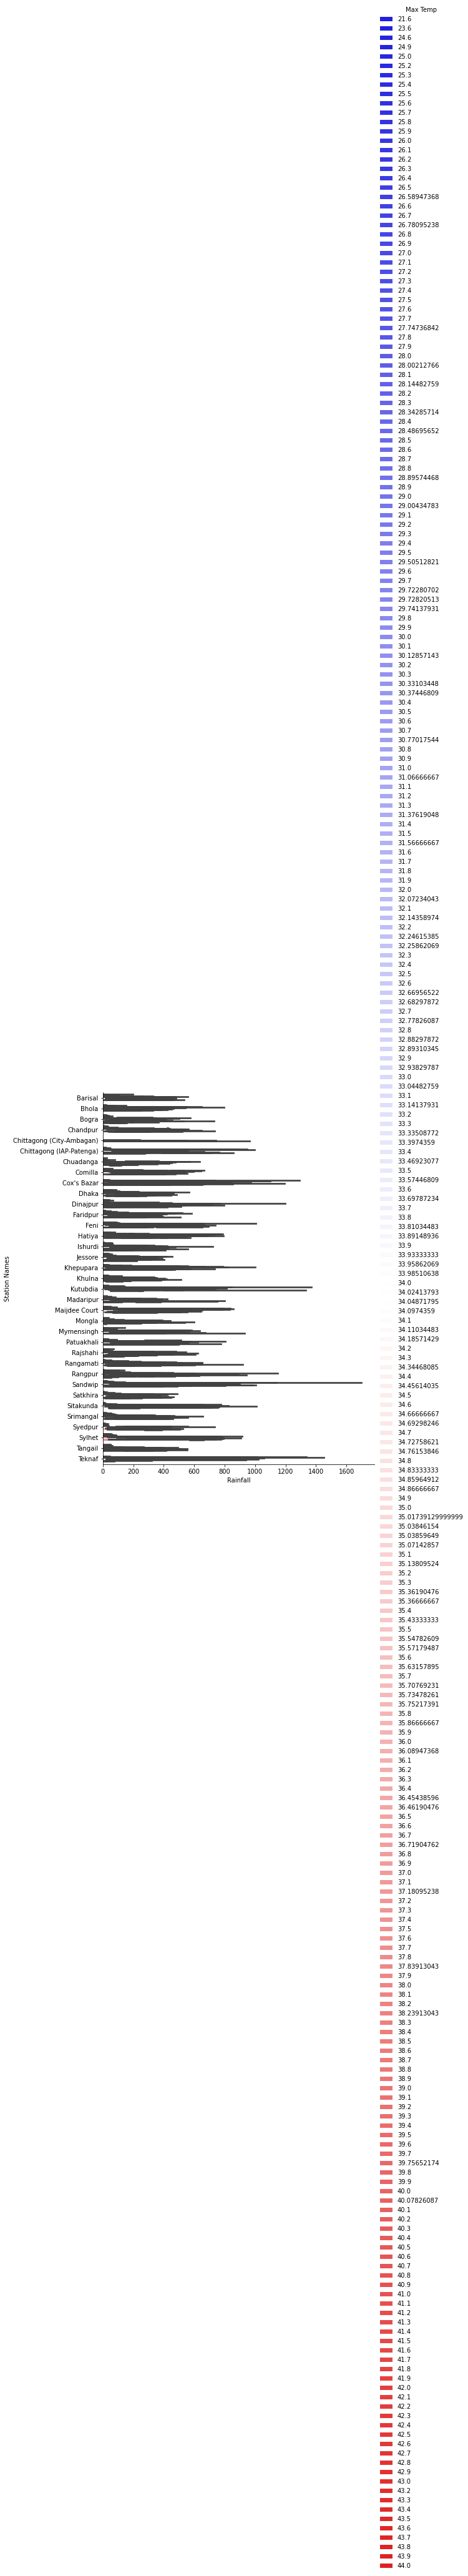

In [0]:
sns.catplot(x = 'Rainfall' , y = 'Station Names' , hue = 'Max Temp' , data = df , height = 9 , kind = 'bar' , palette = "bwr")

Correlation Between Revenue And Budget :  0.2568206722392892


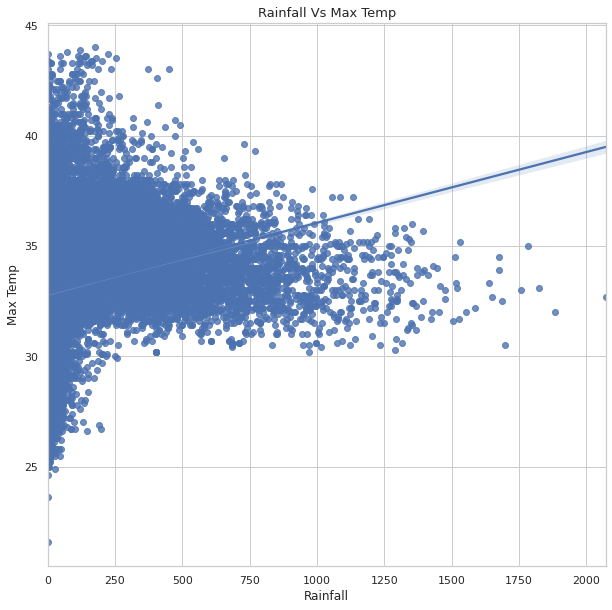

In [19]:
ax = sns.regplot(x = df['Rainfall'], y = df['Max Temp'])

ax.set_title("Rainfall Vs Max Temp",fontsize=13)
ax.set_xlabel("Rainfall",fontsize=12)
ax.set_ylabel("Max Temp",fontsize=12)

sns.set(rc={'figure.figsize':(10 , 10)})
sns.set_style("whitegrid")

data_corr = df.corr()
print("Correlation Between Revenue And Budget : ",data_corr.loc['Rainfall' , 'Max Temp'])

Between 30-35 temperature the rainfall is high those area.

### Working with ALTITUDE

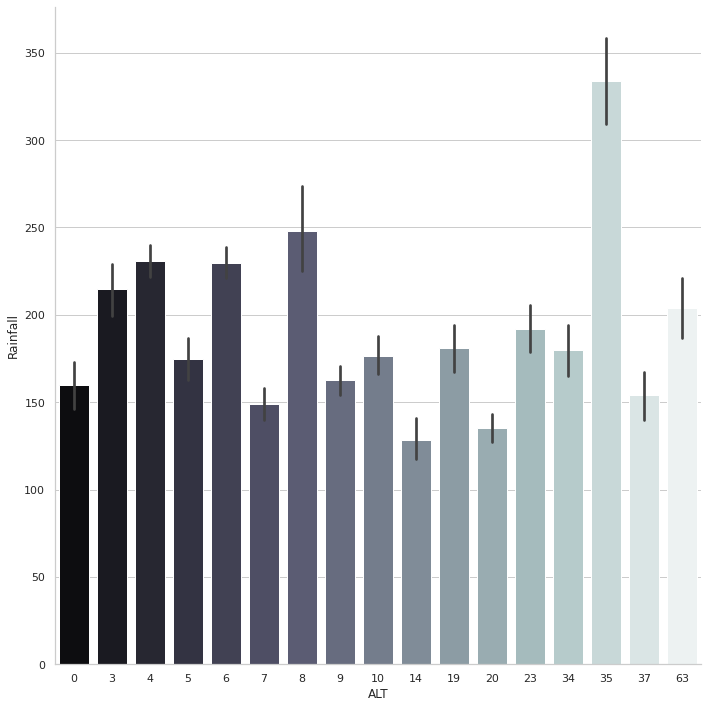

In [23]:
sns.catplot(x = 'ALT' , y = 'Rainfall' , data = df , kind = 'bar' , palette = 'bone' , height = 10)

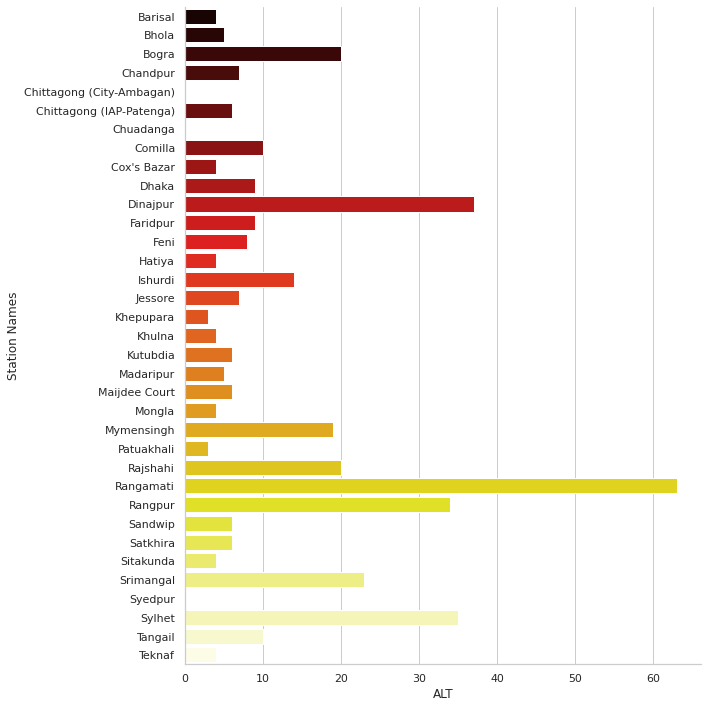

In [24]:
sns.catplot(x = 'ALT' , y = 'Station Names' , data = df , kind = 'bar' , palette = 'hot' , height = 10)

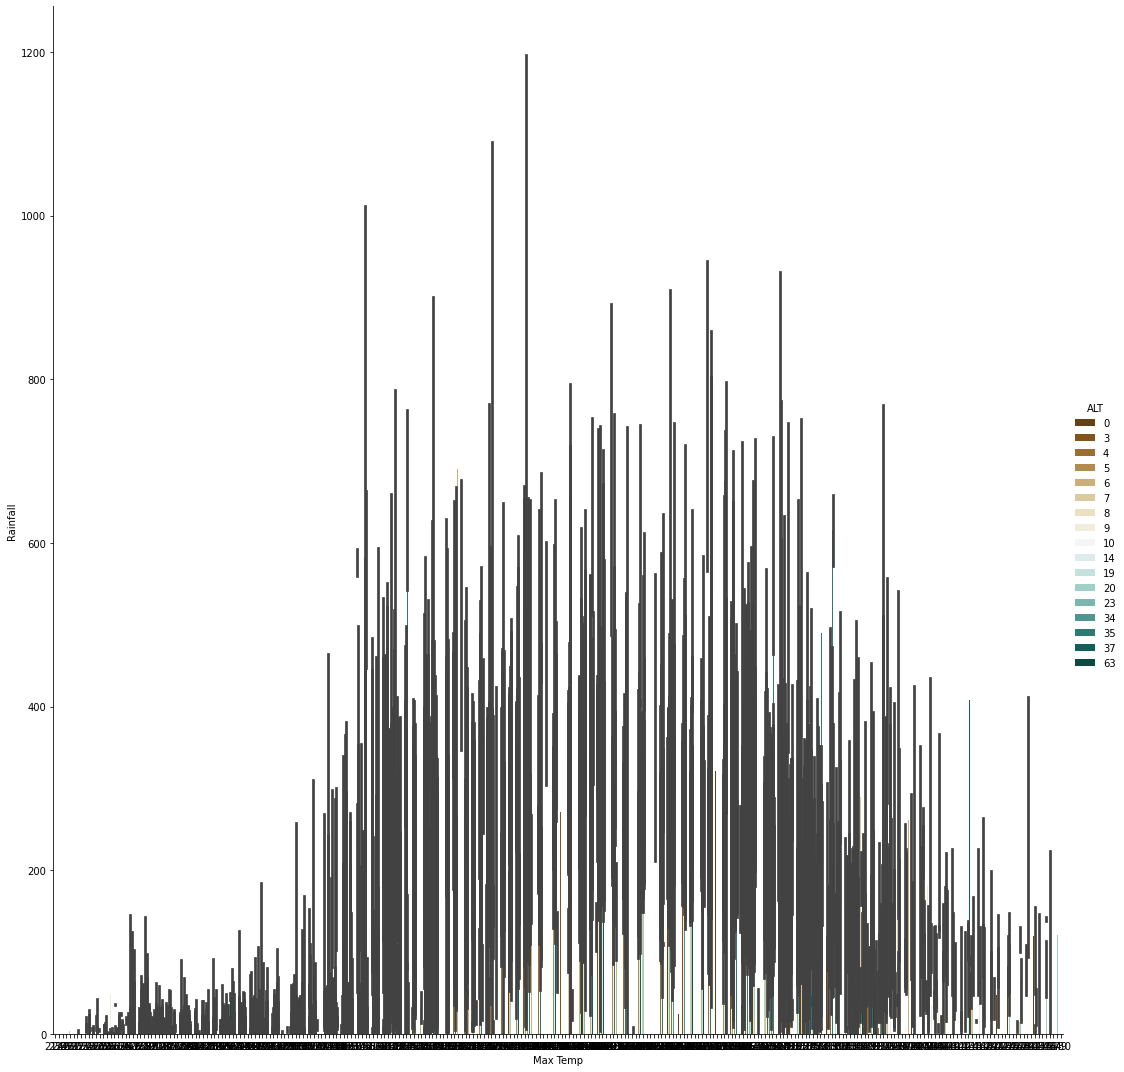

In [16]:
sns.catplot(x = 'Max Temp' , y = 'Rainfall' , hue = 'ALT' , data = df , height = 15 , kind = 'bar' , palette = "BrBG")

### Relation between other columns with rainfall

Correlation Between Rainfall and Cloud Coverage :  0.7668211618135514


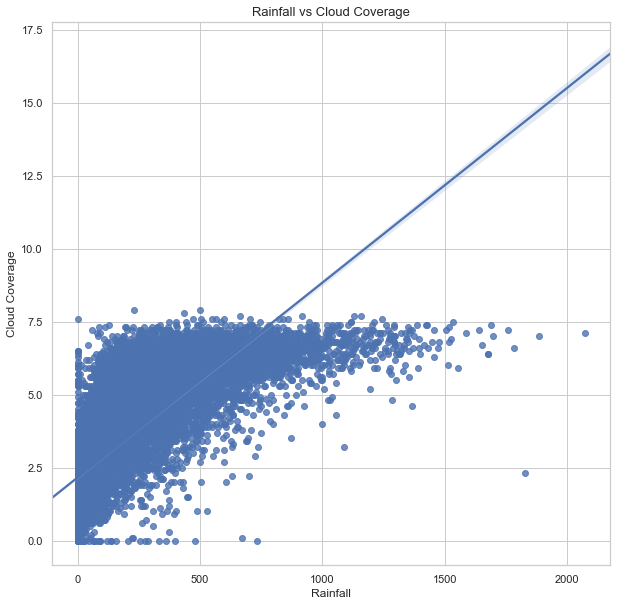

In [13]:
ax = sns.regplot(x = df['Rainfall'], y = df['Cloud Coverage'])

ax.set_title("Rainfall vs Cloud Coverage" , fontsize=13)
ax.set_xlabel("Rainfall" , fontsize=12)
ax.set_ylabel("Cloud Coverage" , fontsize=12)

sns.set(rc={'figure.figsize':(13 , 13)})
sns.set_style("whitegrid")

data_corr = df.corr()
print("Correlation Between Rainfall and Cloud Coverage : " , data_corr.loc['Rainfall' , 'Cloud Coverage']) 

Correlation Between Max Temp and Cloud Coverage :  0.462700967795601


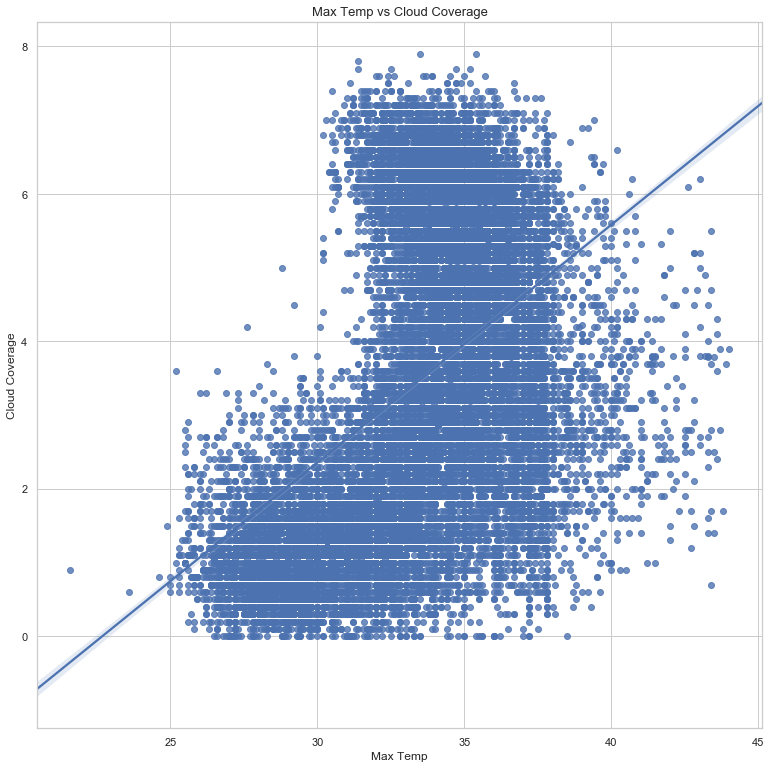

In [16]:
ax = sns.regplot(x = df['Max Temp'], y = df['Cloud Coverage'])

ax.set_title("Max Temp vs Cloud Coverage" , fontsize=13)
ax.set_xlabel("Max Temp" , fontsize=12)
ax.set_ylabel("Cloud Coverage" , fontsize=12)

sns.set(rc={'figure.figsize':(13 , 13)})
sns.set_style("whitegrid")

data_corr = df.corr()
print("Correlation Between Max Temp and Cloud Coverage : " , data_corr.loc['Max Temp' , 'Cloud Coverage']) 

Correlation Between Wind Speed and Cloud Coverage :  0.38389016182111146


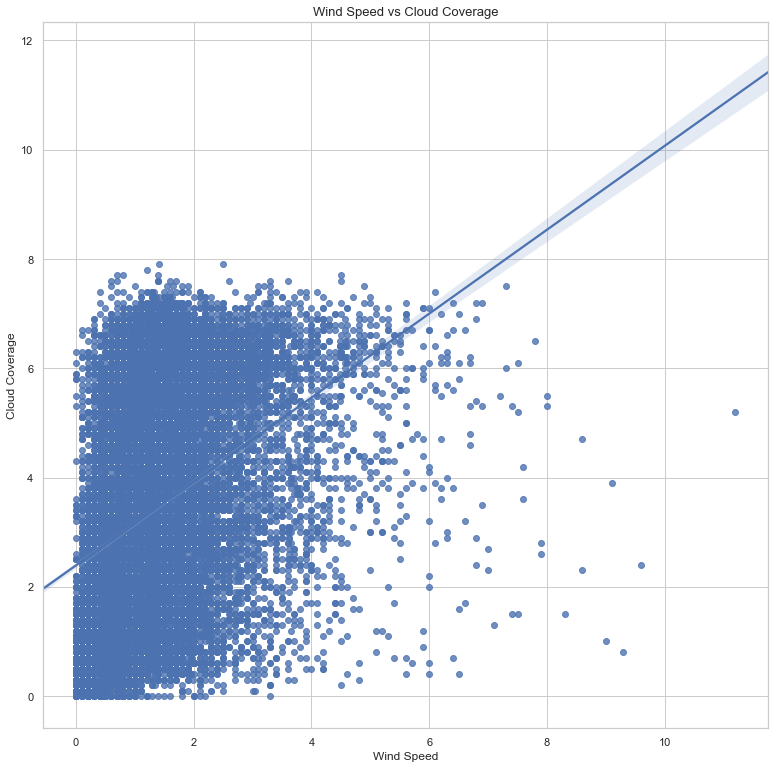

In [19]:
ax = sns.regplot(x = df['Wind Speed'], y = df['Cloud Coverage'])

ax.set_title("Wind Speed vs Cloud Coverage" , fontsize=13)
ax.set_xlabel("Wind Speed" , fontsize=12)
ax.set_ylabel("Cloud Coverage" , fontsize=12)

sns.set(rc={'figure.figsize':(13 , 13)})
sns.set_style("whitegrid")

data_corr = df.corr()
print("Correlation Between Wind Speed and Cloud Coverage : " , data_corr.loc['Wind Speed' , 'Cloud Coverage']) 

Due to low Wind speed the cloud coverage is high.High wind speed have very very low cloud coverage.

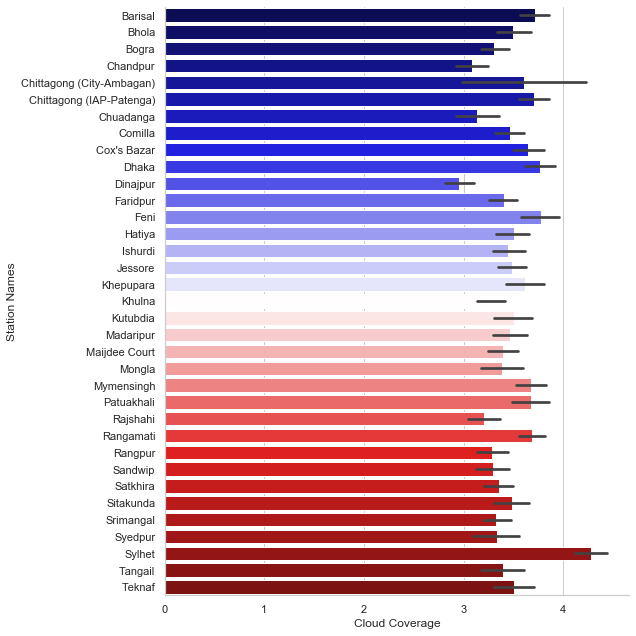

In [24]:
sns.catplot(x = 'Cloud Coverage' , y = 'Station Names' , data = df , height = 9 , kind = 'bar' , palette = 'seismic')

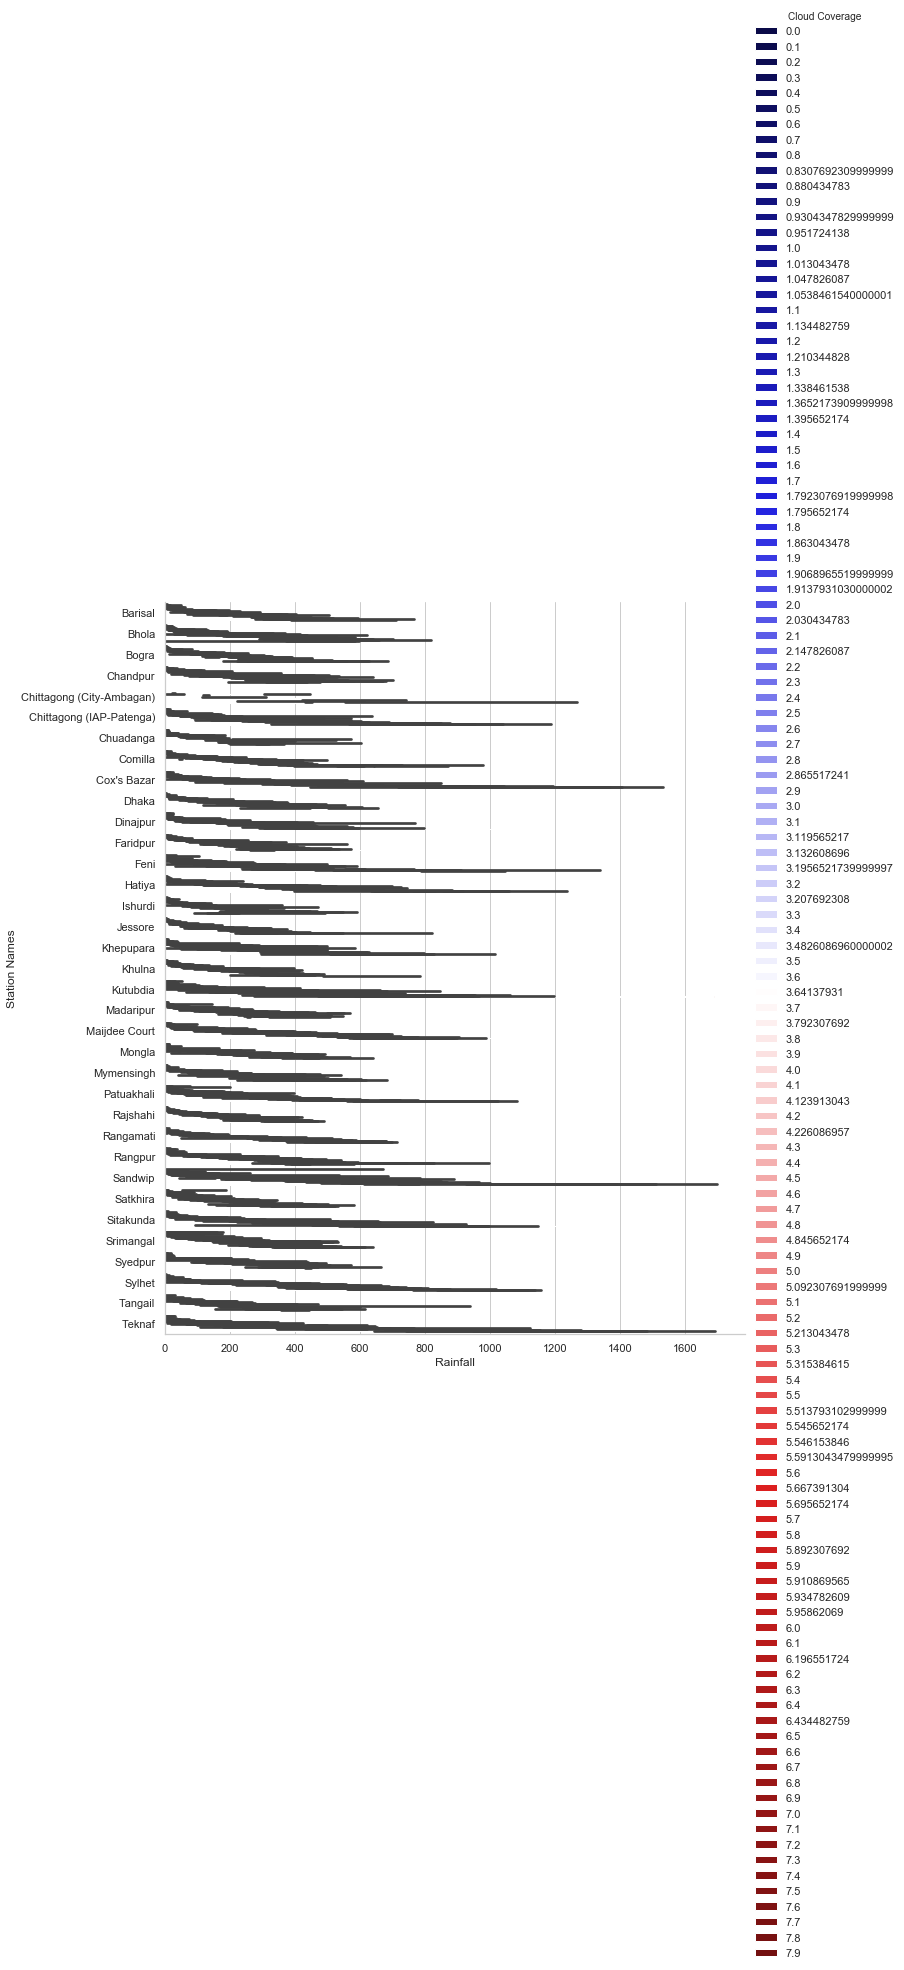

In [27]:
sns.catplot(x = 'Rainfall' , y = 'Station Names' , hue = 'Cloud Coverage' , data = df , height = 11 , kind = 'bar' , palette = 'seismic')

Which area have high cloud coverage those area have higest rainfall.

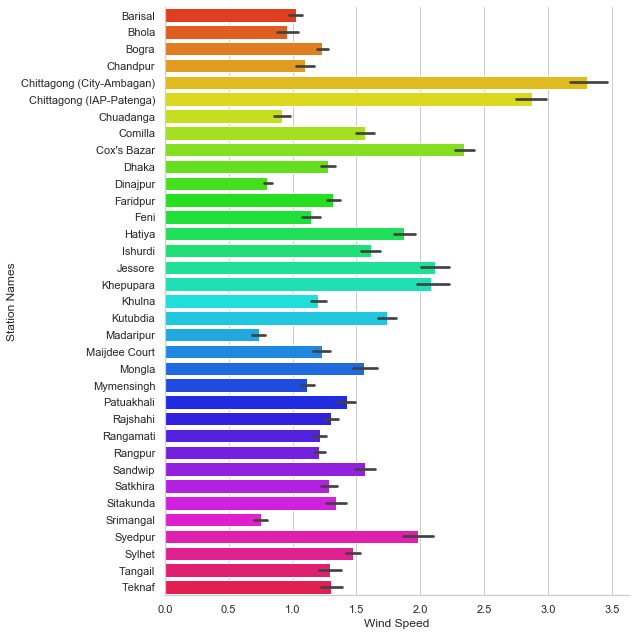

In [28]:
sns.catplot(x = 'Wind Speed' , y = 'Station Names' , data = df , height = 9 , kind = 'bar' , palette = 'hsv')

Wind speed isalso high on those area

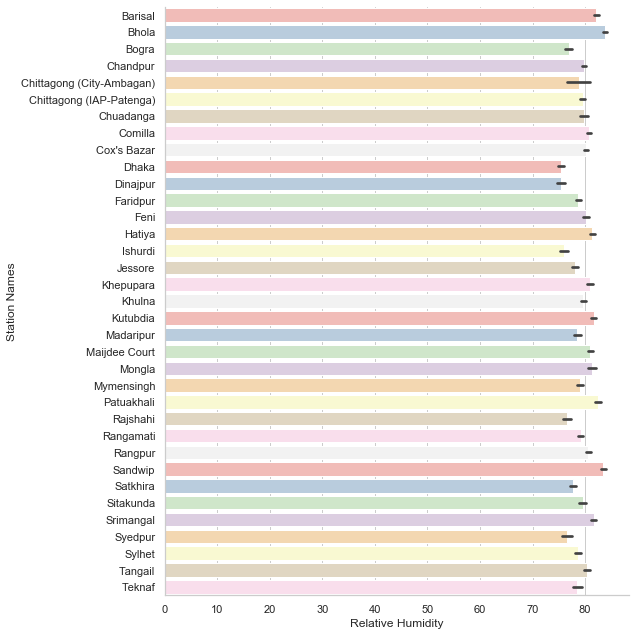

In [31]:
sns.catplot(x = 'Relative Humidity' , y = 'Station Names' , data = df , height = 9 , kind = 'bar' , palette = 'Pastel1')

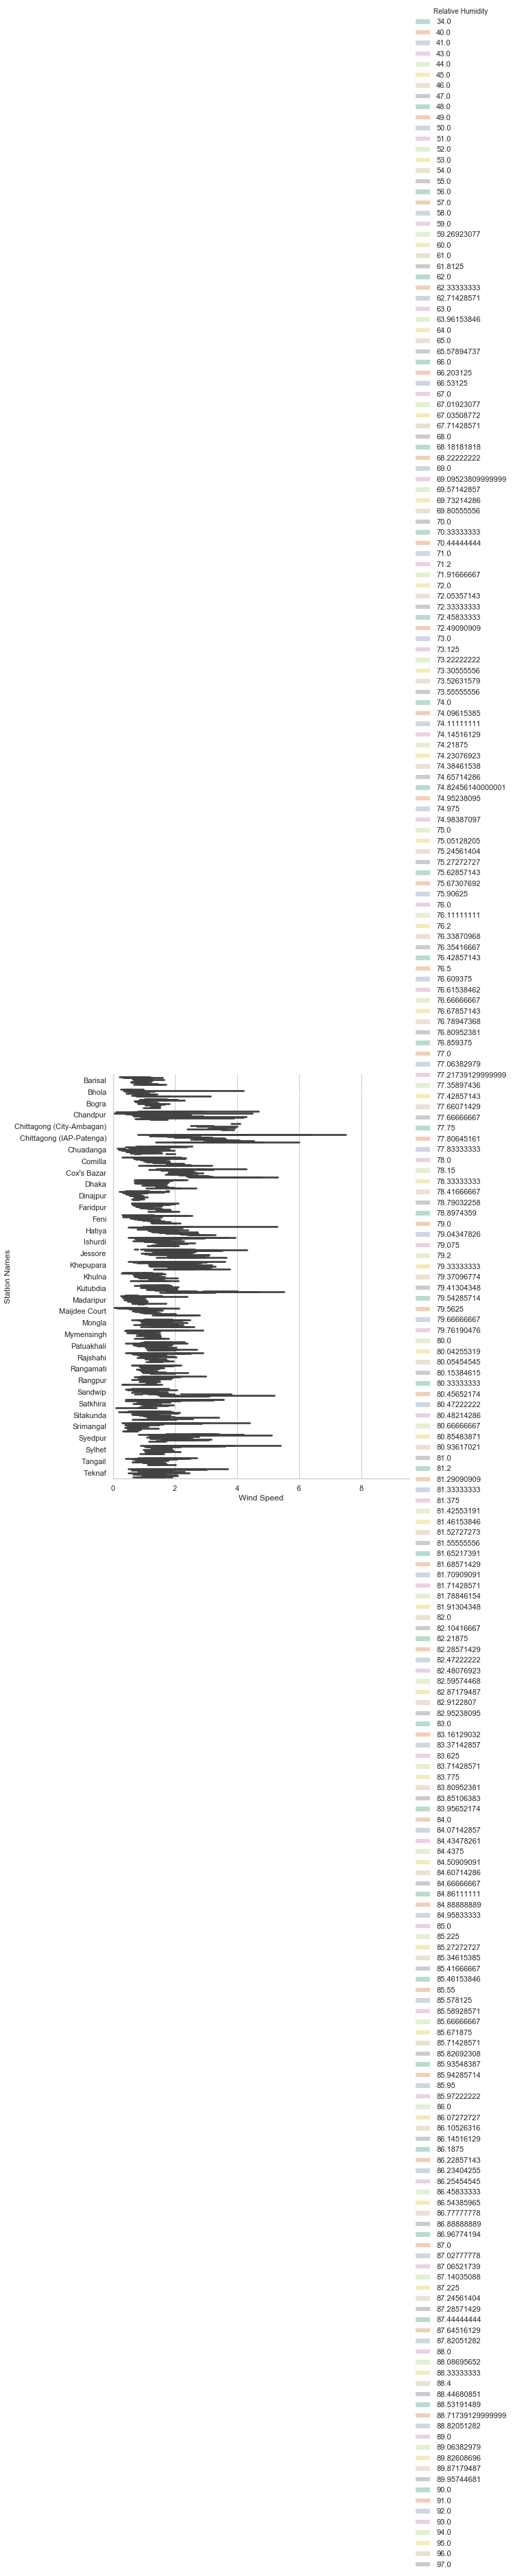

In [33]:
sns.catplot(x = 'Wind Speed' , y = 'Station Names' , hue = 'Relative Humidity' , data = df , height = 9 , kind = 'bar' , palette = 'Pastel2')

### Which area have highest rainfall over the last 65 years

In [5]:
np.unique(df['Station Names'])

array(['Barisal', 'Bhola', 'Bogra', 'Chandpur',
       'Chittagong (City-Ambagan)', 'Chittagong (IAP-Patenga)',
       'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur',
       'Faridpur', 'Feni', 'Hatiya', 'Ishurdi', 'Jessore', 'Khepupara',
       'Khulna', 'Kutubdia', 'Madaripur', 'Maijdee Court', 'Mongla',
       'Mymensingh', 'Patuakhali', 'Rajshahi', 'Rangamati', 'Rangpur',
       'Sandwip', 'Satkhira', 'Sitakunda', 'Srimangal', 'Syedpur',
       'Sylhet', 'Tangail', 'Teknaf'], dtype=object)

In [6]:
np.unique(df['YEAR'])

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
      dtype=int64)

In [7]:
genre_details = list(map(str,(df['Station Names'])))

genre = ['Barisal', 'Bhola', 'Bogra', 'Chandpur',
       'Chittagong (City-Ambagan)', 'Chittagong (IAP-Patenga)',
       'Chuadanga', 'Comilla', "Cox's Bazar", 'Dhaka', 'Dinajpur',
       'Faridpur', 'Feni', 'Hatiya', 'Ishurdi', 'Jessore', 'Khepupara',
       'Khulna', 'Kutubdia', 'Madaripur', 'Maijdee Court', 'Mongla',
       'Mymensingh', 'Patuakhali', 'Rajshahi', 'Rangamati', 'Rangpur',
       'Sandwip', 'Satkhira', 'Sitakunda', 'Srimangal', 'Syedpur',
       'Sylhet', 'Tangail', 'Teknaf']


#make the numpy array of year and popularity which contain all the rows of release_year and popularity column. 
year = np.array(df['YEAR'])
popularity = np.array(df['Rainfall'])

#make a null dataframe which indexs are genres and columns are years.
popularity_df = pd.DataFrame(index = genre, columns = range(1948, 2014))
#change all the values of the dataframe from NAN to zero.
popularity_df = popularity_df.fillna(value = 0.0)


z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1

In [8]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

1948      1949      1950      1951      1952  \
Barisal                   -0.585974  1.135033  1.292849  0.995614  0.841121   
Bhola                     -0.585974 -0.672552 -0.638047 -0.682936 -0.695109   
Bogra                      0.927871  0.716355  0.549467  0.511230  0.801512   
Chandpur                  -0.585974 -0.672552 -0.638047 -0.682936 -0.695109   
Chittagong (City-Ambagan) -0.585974 -0.672552 -0.638047 -0.682936 -0.695109   

                               1953      1954      1955      1956      1957  \
Barisal                    0.885955  0.492748  0.889671  1.319123  0.758156   
Bhola                     -0.762409 -0.795020 -0.810777 -0.856842 -0.856111   
Bogra                      0.097536  0.742492  1.074502  0.500056  0.589421   
Chandpur                  -0.762409 -0.795020 -0.810777 -0.856842 -0.856111   
Chittagong (City-Ambagan) -0.762409 -0.795020 -0.810777 -0.856842 -0.856111   

                           ...      2004      2005      2006      2007  \
Barisal                    ... -0.123516 -0.613645 -0.135044 -0.353503   
Bhola                      ...  0.525357 -0.086366  0.097989 -0.353503   
Bogra                      ... -0.561594 -0.429160 -1.223342 -0.766596   
Chandpur                   ... -0.295450 -1.117240 -0.481542 -0.343402   
Chittagong (City-Ambagan)  ... -3.101740 -3.035637 -2.572734 -2.704800   

                               2008      2009      2010      2011      2012  \
Barisal                   -0.454226 -0.578508 -0.477295 -0.621790 -0.601752   
Bhola                     -0.301341 -0.443768 -0.364518 -0.509398 -0.710519   
Bogra                     -0.529635 -1.130940 -0.878165 -0.821126 -1.020154   
Chandpur                  -0.169117 -0.947694 -0.371695 -0.389584 -0.478950   
Chittagong (City-Ambagan) -2.379741  0.913509 -2.181250  0.670715  0.852567   

                               2013  
Barisal                    0.024125  
Bhola                     -0.122974  
Bogra                     -1.252273  
Chandpur                   0.283574  
Chittagong (City-Ambagan)  0.091304  

[5 rows x 66 columns]

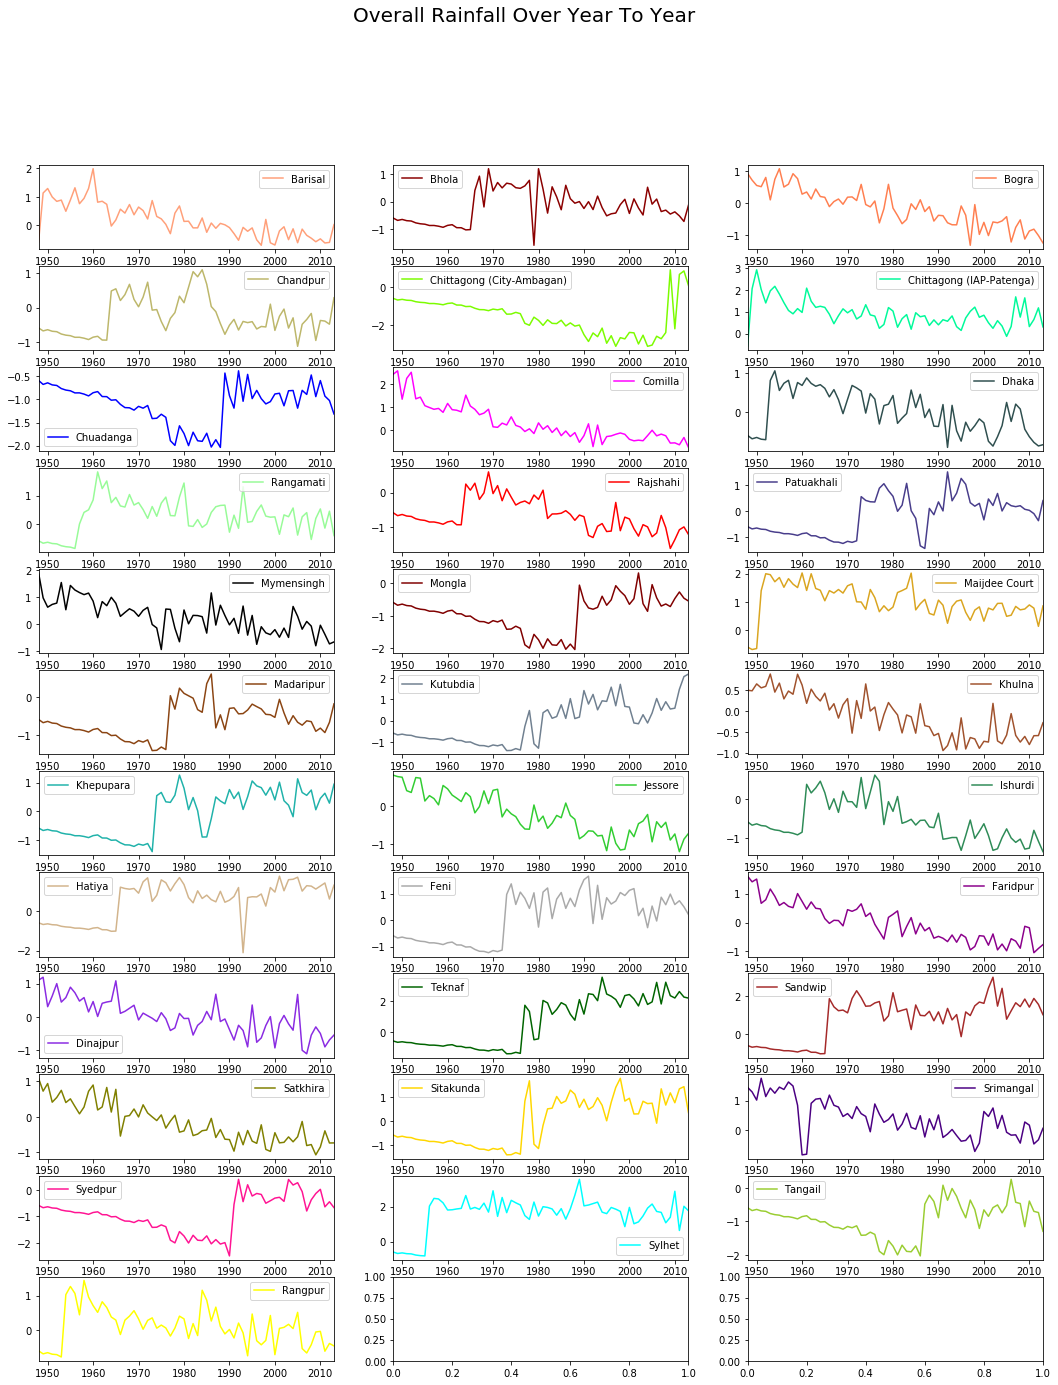

In [18]:
fig, ax = plt.subplots(12 ,3 , figsize = (18 , 22))
fig.suptitle('Overall Rainfall Over Year To Year' , fontsize = 20)

popular_genre.loc['Barisal'].plot(label = "Barisal" , color = '#FFA07A' , ax = ax[0][0] , legend = True)
popular_genre.loc['Bhola'].plot(label = "Bhola" , color = '#8B0000' , ax = ax[0][1] , legend = True)
popular_genre.loc['Bogra'].plot(label = "Bogra" , color='#FF7F50',ax = ax[0][2] , legend = True)


popular_genre.loc['Chandpur'].plot(label = "Chandpur",color='#BDB76B',ax = ax[1][0] , legend = True)
popular_genre.loc['Chittagong (City-Ambagan)'].plot(label = "Chittagong (City-Ambagan)" , color='#7CFC00',ax = ax[1][1] , legend = True)
popular_genre.loc['Chittagong (IAP-Patenga)'].plot(label = "Chittagong (IAP-Patenga)",color='#00FA9A',ax = ax[1][2] , legend = True)
popular_genre.loc['Chuadanga'].plot(label = "Chuadanga" , color='#0000FF',ax = ax[2][0] , legend = True)
popular_genre.loc['Comilla'].plot(label = "Comilla",color='#FF00FF',ax = ax[2][1] , legend = True)
popular_genre.loc['Dhaka'].plot(label = "Dhaka",color='#2F4F4F',ax = ax[2][2],legend=True)

popular_genre.loc['Rangamati'].plot(label = "Rangamati",color='#98FB98',ax = ax[3][0] , legend = True)


popular_genre.loc['Rajshahi'].plot(label = "Rajshahi" , color = '#FF0000' , ax = ax[3][1] , legend = True)


popular_genre.loc['Patuakhali'].plot(label = "Patuakhali" , color='#483D8B',ax = ax[3][2] , legend = True)
popular_genre.loc['Mymensingh'].plot(label = "Mymensingh",color='#000000',ax = ax[4][0] , legend = True)
popular_genre.loc['Mongla'].plot(label = "Mongla" , color='#800000',ax = ax[4][1],legend=True)
popular_genre.loc['Maijdee Court'].plot(label = "Maijdee Court",color='#DAA520',ax = ax[4][2] , legend = True)
popular_genre.loc['Madaripur'].plot(label = "Madaripur" , color = '#8B4513',ax = ax[5][0] , legend = True)
popular_genre.loc['Kutubdia'].plot(label = "Kutubdia",color='#708090',ax = ax[5][1],legend=True)

popular_genre.loc['Khulna'].plot(label = "Khulna" ,color = '#A0522D',ax = ax[5][2] , legend = True)


popular_genre.loc['Khepupara'].plot(label = "Khepupara",color='#20B2AA',ax = ax[6][0] , legend = True)


popular_genre.loc['Jessore'].plot(label = "Jessore",color='#32CD32',ax = ax[6][1] , legend = True)


popular_genre.loc['Ishurdi'].plot(label = "Ishurdi" , color='#2E8B57',ax = ax[6][2] , legend = True)

popular_genre.loc['Hatiya'].plot(label = "Hatiya" , color = '#D2B48C',ax = ax[7][0] , legend = True)
popular_genre.loc['Feni'].plot(label = "Feni" , color = '#A9A9A9',ax = ax[7][1] , legend = True)
popular_genre.loc['Faridpur'].plot(label = "Faridpur",color='#8B008B',ax = ax[7][2] , legend = True)
popular_genre.loc['Dinajpur'].plot(label = "Dinajpur" , color = '#8A2BE2',ax = ax[8][0] , legend = True)
popular_genre.loc['Teknaf'].plot(label = "Teknaf" , color = '#006400',ax = ax[8][1] , legend = True)

                

popular_genre.loc['Sandwip'].plot(label = "Sandwip",color='#A52A2A',ax = ax[8][2] , legend = True)

popular_genre.loc['Satkhira'].plot(label = "Satkhira" , color='#808000',ax = ax[9][0] , legend = True)
popular_genre.loc['Sitakunda'].plot(label = "Sitakunda",color='#FFD700',ax = ax[9][1] , legend = True)
popular_genre.loc['Srimangal'].plot(label = "Srimangal" , color = '#4B0082' , ax = ax[9][2] , legend = True)
popular_genre.loc['Syedpur'].plot(label = "Syedpur",color='#FF1493',ax = ax[10][0] , legend = True)
popular_genre.loc['Sylhet'].plot(label = "Sylhet",color='#00FFFF',ax = ax[10][1] , legend = True)
popular_genre.loc['Tangail'].plot(label = "Tangail" , color = '#9ACD32',ax = ax[10][2] , legend = True)

popular_genre.loc['Rangpur'].plot(label = "Rangpur",color = '#FFFF00',ax = ax[11][0] , legend = True)

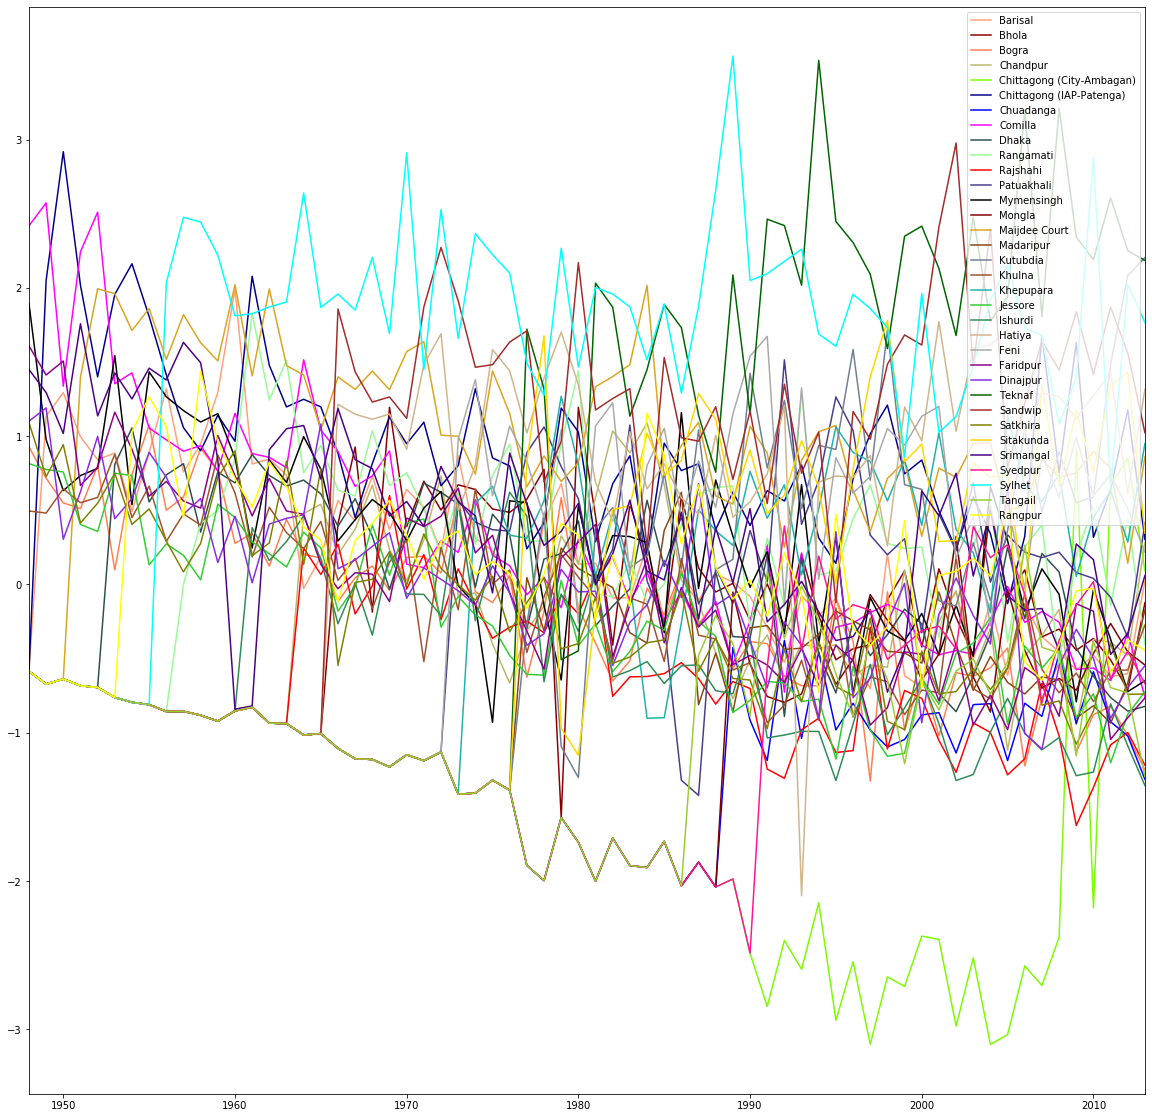

In [22]:
plt.figure(figsize = (20 , 20))

fig.suptitle('Overall Rainfall Over Year To Year' , fontsize = 20)

popular_genre.loc['Barisal'].plot(label = "Barisal" , color = '#FFA07A' , legend = True)
popular_genre.loc['Bhola'].plot(label = "Bhola" , color = '#8B0000' ,  legend = True)
popular_genre.loc['Bogra'].plot(label = "Bogra" , color='#FF7F50', legend = True)
popular_genre.loc['Chandpur'].plot(label = "Chandpur",color='#BDB76B', legend = True)
popular_genre.loc['Chittagong (City-Ambagan)'].plot(label = "Chittagong (City-Ambagan)" , color='#7CFC00' , legend = True)
popular_genre.loc['Chittagong (IAP-Patenga)'].plot(label = "Chittagong (IAP-Patenga)",color='#00008B', legend = True)
popular_genre.loc['Chuadanga'].plot(label = "Chuadanga" , color='#0000FF', legend = True)
popular_genre.loc['Comilla'].plot(label = "Comilla",color='#FF00FF', legend = True)
popular_genre.loc['Dhaka'].plot(label = "Dhaka",color='#2F4F4F',legend=True)

popular_genre.loc['Rangamati'].plot(label = "Rangamati",color='#98FB98', legend = True)


popular_genre.loc['Rajshahi'].plot(label = "Rajshahi" , color = '#FF0000' ,  legend = True)


popular_genre.loc['Patuakhali'].plot(label = "Patuakhali" , color='#483D8B', legend = True)
popular_genre.loc['Mymensingh'].plot(label = "Mymensingh",color='#000000', legend = True)
popular_genre.loc['Mongla'].plot(label = "Mongla" , color='#800000',legend=True)
popular_genre.loc['Maijdee Court'].plot(label = "Maijdee Court",color='#DAA520',legend = True)
popular_genre.loc['Madaripur'].plot(label = "Madaripur" , color = '#8B4513', legend = True)
popular_genre.loc['Kutubdia'].plot(label = "Kutubdia",color='#708090',legend=True)

popular_genre.loc['Khulna'].plot(label = "Khulna" ,color = '#A0522D',legend = True)


popular_genre.loc['Khepupara'].plot(label = "Khepupara",color='#20B2AA',legend = True)


popular_genre.loc['Jessore'].plot(label = "Jessore",color='#32CD32',legend = True)


popular_genre.loc['Ishurdi'].plot(label = "Ishurdi" , color='#2E8B57',legend = True)

popular_genre.loc['Hatiya'].plot(label = "Hatiya" , color = '#D2B48C',legend = True)
popular_genre.loc['Feni'].plot(label = "Feni" , color = '#A9A9A9',legend = True)
popular_genre.loc['Faridpur'].plot(label = "Faridpur",color='#8B008B',legend = True)
popular_genre.loc['Dinajpur'].plot(label = "Dinajpur" , color = '#8A2BE2',legend = True)
popular_genre.loc['Teknaf'].plot(label = "Teknaf" , color = '#006400',legend = True)

                

popular_genre.loc['Sandwip'].plot(label = "Sandwip",color='#A52A2A',legend = True)

popular_genre.loc['Satkhira'].plot(label = "Satkhira" , color='#808000',legend = True)
popular_genre.loc['Sitakunda'].plot(label = "Sitakunda",color='#FFD700',legend = True)
popular_genre.loc['Srimangal'].plot(label = "Srimangal" , color = '#4B0082' , legend = True)
popular_genre.loc['Syedpur'].plot(label = "Syedpur",color='#FF1493',legend = True)
popular_genre.loc['Sylhet'].plot(label = "Sylhet",color='#00FFFF',legend = True)
popular_genre.loc['Tangail'].plot(label = "Tangail" , color = '#9ACD32',legend = True)

popular_genre.loc['Rangpur'].plot(label = "Rangpur",color = '#FFFF00', legend = True)


#### Last 65 years Sylhet and Tecnaf had the highest rainfall and Satkhira had the lowest rainfall over year by year.It is a very simple visualization tecniques for find out the highest rainfall in Bangladesh.